<a href="https://colab.research.google.com/github/YolandaMDavis/cs109a-fall2020/blob/socio-economic/EconomicDataExporation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
data_path = "/content/drive/My Drive/Final-Project-for-CS109a/"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel(data_path + 'boston_neighborhood_demographics_2013-2017.xlsx', sheet_name="HH Income", skiprows=[0,1], header=0, skipfooter=3)

In [30]:
data.head()

,Unnamed: 0,Median Income,Total Households,"$14,999 and under",%,"$15,000 to $24,999",%.1,"$25,000 to $34,999",%.2,"$35,000 to $49,999",%.3,"$50,000 to $74,999",%.4,"$75,000 to $99,999",%.5,"$100,000 to $149,999",%.6,"$150,000 +",%.7
0,United States,57652.00,118825921,13710365,0.115382,11637905,0.097941,11330288,0.095352,15412493,0.129706,21000314,0.176732,14636046,0.123172,16701857,0.140557,14396653,0.121158
1,Massachusetts,74167.00,2585715,269677,0.104295,203309,0.078628,186707,0.072207,255677,0.098881,390219,0.150913,317494,0.122788,451683,0.174684,510949,0.197605
2,Boston,62021.00,263229,47236,0.179448,22654,0.086062,18413,0.069950,24161,0.091787,37621,0.142921,26157,0.099370,39811,0.151241,47176,0.179220
3,Allston,46982.76,6457,1453,0.225027,584,0.090444,603,0.093387,781,0.120954,1042,0.161375,544,0.084250,912,0.141242,538,0.083320
4,Back Bay,102070.55,9824,1402,0.142712,381,0.038783,350,0.035627,582,0.059243,1237,0.125916,879,0.089475,1586,0.161441,3407,0.346804


In [31]:
data.tail()

,Unnamed: 0,Median Income,Total Households,"$14,999 and under",%,"$15,000 to $24,999",%.1,"$25,000 to $34,999",%.2,"$35,000 to $49,999",%.3,"$50,000 to $74,999",%.4,"$75,000 to $99,999",%.5,"$100,000 to $149,999",%.6,"$150,000 +",%.7
21,South Boston,93077.60,16628,2288,0.137599,1174,0.070604,857,0.051540,1020,0.061342,1745,0.104943,1701,0.102297,3249,0.195393,4594,0.276281
22,South Boston Waterfront,150677.51,1830,110,0.060109,60,0.032787,58,0.031694,66,0.036066,153,0.083607,192,0.104918,271,0.148087,920,0.502732
23,South End,86994.80,16193,2809,0.173470,1183,0.073056,887,0.054777,887,0.054777,1915,0.118261,866,0.053480,2115,0.130612,5531,0.341567
24,West End,96787.15,3134,489,0.156031,220,0.070198,191,0.060944,163,0.052010,287,0.091576,249,0.079451,500,0.159541,1035,0.330249
25,West Roxbury,80804.46,13757,1187,0.086283,1288,0.093625,788,0.057280,1202,0.087374,2065,0.150105,1501,0.109108,2452,0.178237,3274,0.237988


In [32]:
data.iloc[3:, :2]

,Unnamed: 0,Median Income
3,Allston,46982.76
4,Back Bay,102070.55
5,Beacon Hill,98069.24
6,Brighton,62041.20
7,Charlestown,103243.16
8,Dorchester,49662.36
9,Downtown,67367.09
10,East Boston,52935.36
11,Fenway,39549.84
12,Harbor Islands,NaN


In [33]:
median_income = data.iloc[3:, :2]

In [34]:
median_income = median_income.reset_index(drop=True)

In [35]:
median_income.columns = ['neighborhood', 'median_income']
median_income

,neighborhood,median_income
0,Allston,46982.76
1,Back Bay,102070.55
2,Beacon Hill,98069.24
3,Brighton,62041.20
4,Charlestown,103243.16
5,Dorchester,49662.36
6,Downtown,67367.09
7,East Boston,52935.36
8,Fenway,39549.84
9,Harbor Islands,NaN


In [37]:
income_by_district = pd.merge(median_income,crime_to_districts, on="neighborhood")
income_by_district

,neighborhood,median_income,district
0,Allston,46982.76,D14
1,Back Bay,102070.55,D4
2,Beacon Hill,98069.24,A1
3,Brighton,62041.20,D14
4,Charlestown,103243.16,A15
5,Dorchester,49662.36,C11
6,Downtown,67367.09,A1
7,East Boston,52935.36,A7
8,Fenway,39549.84,D4
9,Harbor Islands,NaN,NaN


In [38]:
boston_income_districts = income_by_district.groupby("district").mean()
boston_income_districts

,median_income
district,
A1,89833.4675
A15,103243.1600
A7,52935.3600
B2,31714.3350
B3,48196.9000
C11,49662.3600
C6,121877.5550
D14,54511.9800
D4,65903.7975


In [ ]:
crime = pd.read_csv(data_path + 'tmpawx7s6l7.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
boston_income_districts = boston_income.groupby("district").mean()["median_income"]

In [ ]:
boston_crime_types = crime[["DISTRICT","OFFENSE_CODE","OFFENSE_CODE_GROUP","OCCURRED_ON_DATE"]]
boston_crime_types.head()

,DISTRICT,OFFENSE_CODE,OFFENSE_CODE_GROUP,OCCURRED_ON_DATE
0,External,423,NaN,2019-10-16 00:00:00
1,C6,3301,NaN,2020-07-18 14:34:00
2,E18,2647,NaN,2020-06-24 10:15:00
3,E13,3301,NaN,2019-12-20 03:08:00
4,C11,3115,NaN,2019-10-23 00:00:00


In [ ]:
boston_crime_income = pd.merge(boston_crime_types,boston_income_districts, left_on="DISTRICT", right_on="district")
boston_crime_income.head()

,DISTRICT,OFFENSE_CODE,OFFENSE_CODE_GROUP,OCCURRED_ON_DATE,median_income
0,C6,3301,NaN,2020-07-18 14:34:00,121877.555
1,C6,3201,NaN,2020-02-09 00:30:00,121877.555
2,C6,3115,NaN,2020-04-18 17:11:00,121877.555
3,C6,619,Larceny,2019-09-29 03:04:00,121877.555
4,C6,3201,Property Lost,2019-09-29 02:21:00,121877.555


In [ ]:
crime[['DISTRICT', 'OFFENSE_CODE_GROUP']].value_counts()

DISTRICT  OFFENSE_CODE_GROUP             
D4        Larceny                            9429
B2        Motor Vehicle Accident Response    8579
C11       Motor Vehicle Accident Response    6994
A1        Larceny                            6430
D4        Motor Vehicle Accident Response    5197
                                             ... 
B2        Manslaughter                          1
B3        Manslaughter                          1
B2        Phone Call Complaints                 1
D4        INVESTIGATE PERSON                    1
C11       HUMAN TRAFFICKING                     1
Length: 730, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


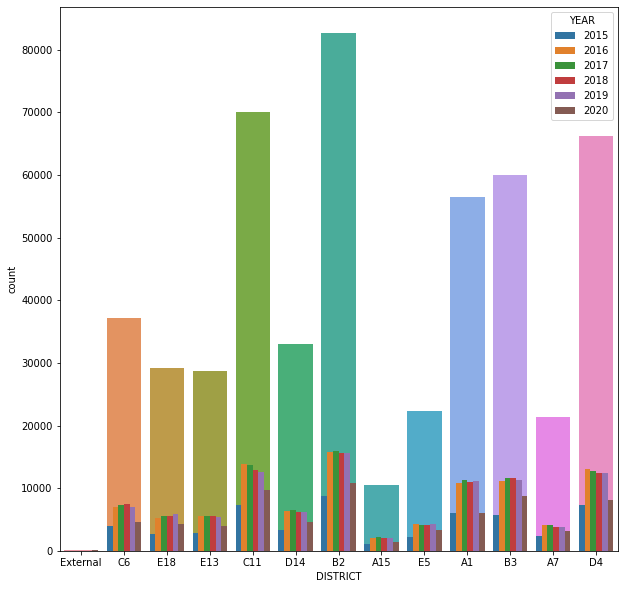

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot('DISTRICT', data=crime)
sns.countplot(x='DISTRICT', hue="YEAR", data=crime)

In [ ]:
august = crime.loc[crime['MONTH']==8]

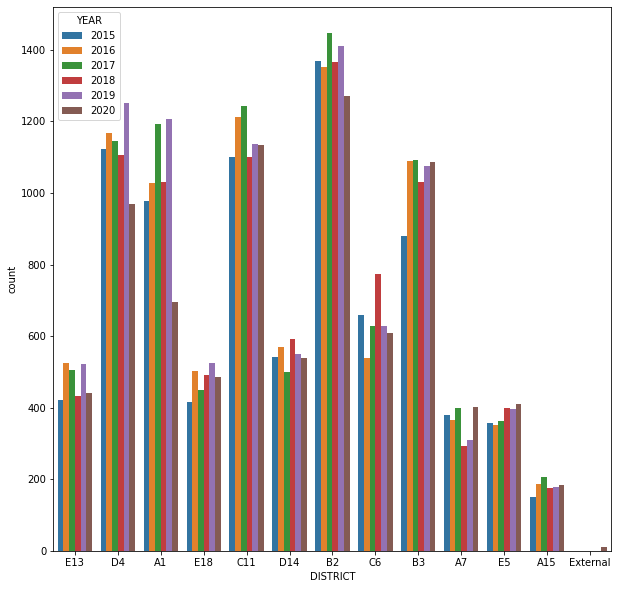

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='DISTRICT', hue='YEAR', data=august)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


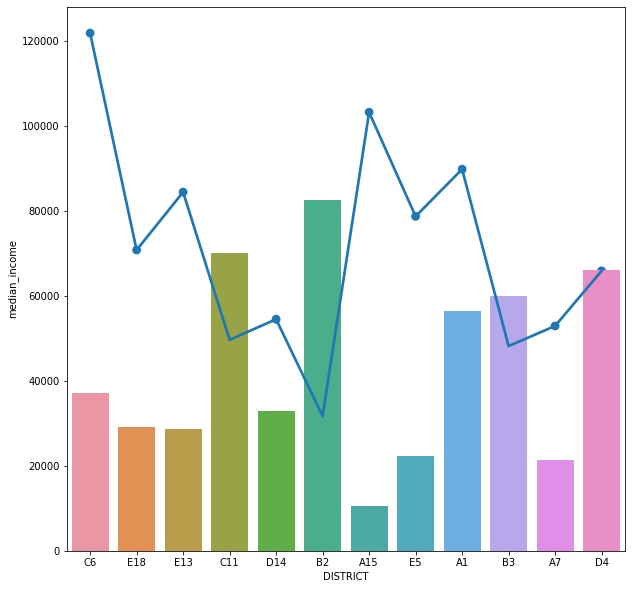

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='DISTRICT', data=boston_crime_income)
sns.pointplot(x='DISTRICT', y="median_income", data=boston_crime_income)

Moving on to **Single Family Households**, and **Youth Unemployment** numbers

In [6]:
demo_race = pd.read_excel(data_path + 'boston_neighborhood_demographics_2013-2017.xlsx', sheet_name="Race and Ethnicity", skiprows=[0,1,2], header=0, skipfooter=3)


In [22]:
race_perc_by_neighborhood = demo_race.iloc[3:, [0,3,5,7,9,11]]
race_perc_by_neighborhood.columns = ["neighborhood", "white", "black", "hispanic", "asian", "other"]
race_perc_by_neighborhood.head()

,neighborhood,white,black,hispanic,asian,other
3,Allston,0.541961,0.061664,0.138098,0.216909,0.041368
4,Back Bay,0.755447,0.041648,0.081426,0.098702,0.022777
5,Beacon Hill,0.834479,0.012614,0.069326,0.061840,0.021741
6,Brighton,0.650266,0.044163,0.108313,0.159139,0.038119
7,Charlestown,0.731972,0.058357,0.118406,0.071636,0.019629


In [18]:
crime_to_districts = pd.read_csv(data_path + 'Boston-Neighborhoods-to-Districts.csv')

In [23]:
race_by_district = pd.merge(race_perc_by_neighborhood,crime_to_districts, on="neighborhood")

In [24]:
race_by_district

,neighborhood,white,black,hispanic,asian,other,district
0,Allston,0.541961,0.061664,0.138098,0.216909,0.041368,D14
1,Back Bay,0.755447,0.041648,0.081426,0.098702,0.022777,D4
2,Beacon Hill,0.834479,0.012614,0.069326,0.061840,0.021741,A1
3,Brighton,0.650266,0.044163,0.108313,0.159139,0.038119,D14
4,Charlestown,0.731972,0.058357,0.118406,0.071636,0.019629,A15
5,Dorchester,0.215249,0.453834,0.180933,0.094452,0.055531,C11
6,Downtown,0.563904,0.034298,0.060577,0.316250,0.024970,A1
7,East Boston,0.325667,0.025571,0.574151,0.038067,0.036545,A7
8,Fenway,0.601203,0.044573,0.115897,0.203141,0.035186,D4
9,Harbor Islands,0.537267,0.295031,0.027950,0.000000,0.139752,NaN


In [26]:
youth_employment = pd.read_excel(data_path + 'boston_neighborhood_demographics_2013-2017.xlsx', sheet_name="Labor Force", skiprows=range(34), header=0, skipfooter=3)

In [28]:
youth_employment_rate = youth_employment.iloc[3:, [0,2,4]]
youth_employment_rate.columns = ['neighborhood', '16-19-employment', '20-34-employment']
youth_employment_rate

,neighborhood,16-19-employment,20-34-employment
3,Allston,0.381298,0.610287
4,Back Bay,0.379937,0.816484
5,Beacon Hill,0.137931,0.936528
6,Brighton,0.401752,0.822183
7,Charlestown,0.377828,0.921227
8,Dorchester,0.411586,0.840373
9,Downtown,0.478317,0.733696
10,East Boston,0.308054,0.855628
11,Fenway,0.430455,0.639059
12,Harbor Islands,0.500000,0.250000


In [29]:
race_employment_by_district = pd.merge(race_by_district,youth_employment_rate, on="neighborhood")
race_employment_by_district

,neighborhood,white,black,hispanic,asian,other,district,16-19-employment,20-34-employment
0,Allston,0.541961,0.061664,0.138098,0.216909,0.041368,D14,0.381298,0.610287
1,Back Bay,0.755447,0.041648,0.081426,0.098702,0.022777,D4,0.379937,0.816484
2,Beacon Hill,0.834479,0.012614,0.069326,0.061840,0.021741,A1,0.137931,0.936528
3,Brighton,0.650266,0.044163,0.108313,0.159139,0.038119,D14,0.401752,0.822183
4,Charlestown,0.731972,0.058357,0.118406,0.071636,0.019629,A15,0.377828,0.921227
5,Dorchester,0.215249,0.453834,0.180933,0.094452,0.055531,C11,0.411586,0.840373
6,Downtown,0.563904,0.034298,0.060577,0.316250,0.024970,A1,0.478317,0.733696
7,East Boston,0.325667,0.025571,0.574151,0.038067,0.036545,A7,0.308054,0.855628
8,Fenway,0.601203,0.044573,0.115897,0.203141,0.035186,D4,0.430455,0.639059
9,Harbor Islands,0.537267,0.295031,0.027950,0.000000,0.139752,NaN,0.500000,0.250000


In [46]:
race_employment_income_by_district = pd.merge(race_employment_by_district, median_income, on="neighborhood")
# bye bye Harbor Islands!
race_employment_income_by_district.drop([9], inplace=True)
race_employment_income_by_district

,neighborhood,white,black,hispanic,asian,other,district,16-19-employment,20-34-employment,median_income
0,Allston,0.541961,0.061664,0.138098,0.216909,0.041368,D14,0.381298,0.610287,46982.76
1,Back Bay,0.755447,0.041648,0.081426,0.098702,0.022777,D4,0.379937,0.816484,102070.55
2,Beacon Hill,0.834479,0.012614,0.069326,0.061840,0.021741,A1,0.137931,0.936528,98069.24
3,Brighton,0.650266,0.044163,0.108313,0.159139,0.038119,D14,0.401752,0.822183,62041.20
4,Charlestown,0.731972,0.058357,0.118406,0.071636,0.019629,A15,0.377828,0.921227,103243.16
5,Dorchester,0.215249,0.453834,0.180933,0.094452,0.055531,C11,0.411586,0.840373,49662.36
6,Downtown,0.563904,0.034298,0.060577,0.316250,0.024970,A1,0.478317,0.733696,67367.09
7,East Boston,0.325667,0.025571,0.574151,0.038067,0.036545,A7,0.308054,0.855628,52935.36
8,Fenway,0.601203,0.044573,0.115897,0.203141,0.035186,D4,0.430455,0.639059,39549.84
10,Hyde Park,0.244541,0.455357,0.248827,0.017981,0.033294,E18,0.402844,0.844272,70810.13
